## Using LayoutParser API to use the Pre-Trained and Fine-tuned Model in Verifying the Model's Performance

In [43]:
import layoutparser as lp
import cv2
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
import os
import mlflow

In [44]:
# Importing an example image
imageex = cv2.imread("../example_images/example-1.jpg")
image = imageex[..., ::-1]

#### Result Showing Pre-trained Model

In [45]:
# Loading pre-trained config file and the model weights
pre_trained = lp.Detectron2LayoutModel(
    config_path = "../pre-trained/mask_rcnn_X_101_32x8d_FPN_3x/config.yaml",
    model_path = "../pre-trained/mask_rcnn_X_101_32x8d_FPN_3x/model_final.pth",
    extra_config = ["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8], 
    label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

In [46]:
layout_pretrained = pre_trained.detect(image)

In [47]:
# Defining color map according to the classes
color_map_pt = {
    'Text':   'orange',
    'Title':  'grey',
    'List':   'brown',
    'Table':  'green',
    'Figure': 'blue',
}

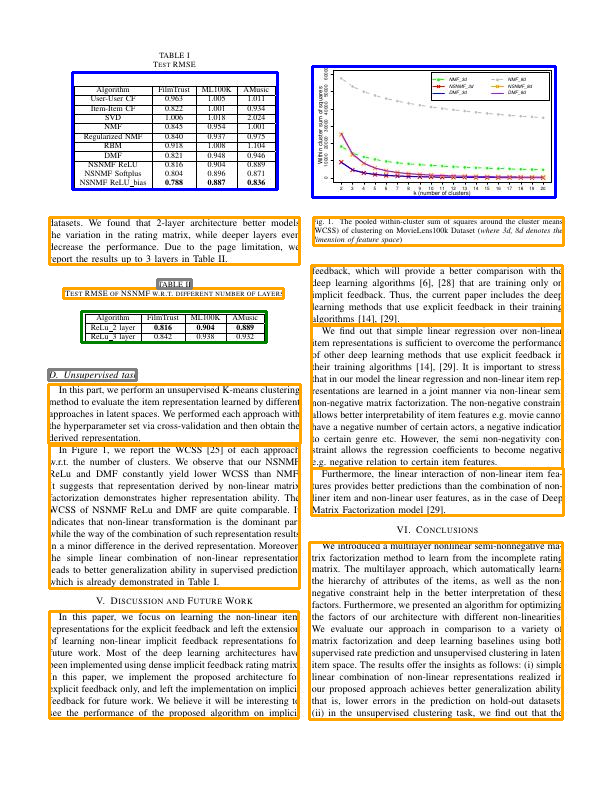

In [48]:
# Drawing the bounding boxes
type = [b.set(id=f'{b.type}') for b in layout_pretrained]
lp.draw_box(image,
              type,
              color_map=color_map_pt,
              show_element_id=False, id_font_size=30,
              id_text_background_color='black',
              id_text_color='white',
              box_width = 3)

#### Result Showing Fine Tuned Model

In [49]:
# Loading fine-tuned config file and the model weights
fine_tuned = lp.Detectron2LayoutModel(
    config_path = "fine-tuned-model/finetuned/after_train_config_file/finalconfig.yaml",
    model_path = "fine-tuned-model/finetuned/model_final.pth",
    extra_config = ["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8], 
    label_map={0: "caption", 1: "table", 2: "table_caption"})

Loading config fine-tuned-model/finetuned/after_train_config_file/finalconfig.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


In [50]:
layout_finetuned = fine_tuned.detect(image)

In [51]:
# Defining color map according to the classes
color_map_ft = {
    'caption': 'orange',
    'table_caption': 'red',
    'table': 'green',
}

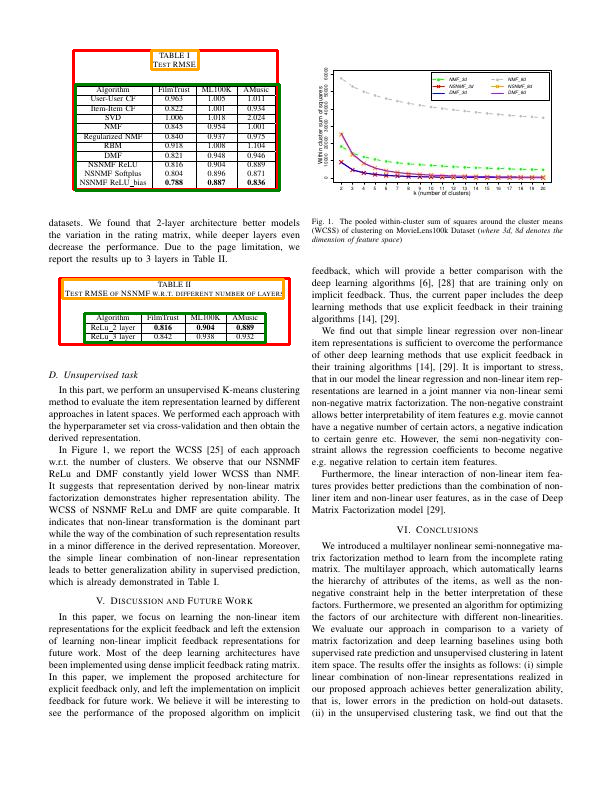

In [52]:
# Drawing the bounding boxes
type = [b.set(id=f'{b.type}') for b in layout_finetuned]
lp.draw_box(image,
              type,
              color_map=color_map_ft,
              show_element_id=False, id_font_size=30,
              id_text_background_color='black',
              id_text_color='white',
              box_width = 3)